In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from datetime import datetime

pd.options.display.max_columns = 50

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('train.csv', parse_dates=['Open Date'])

In [3]:
test_df = pd.read_csv('test.csv', parse_dates=['Open Date'])

In [4]:
union_df = pd.concat([df.drop(columns ='revenue'), test_df], axis = 0)

### LITTLE EDA ON DATASET

In [5]:
## checking the range of revenues accross different categorical columns

def plot_box(feature):
    sns.boxplot(df[feature], df['revenue'])
    
#features = ['P' + str(i) for i in range(1, 38)]
features = ['City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']

interact(plot_box, feature = features)

interactive(children=(Dropdown(description='feature', options=('City Group', 'Type', 'P1', 'P2', 'P3', 'P4', '…

<function __main__.plot_box(feature)>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

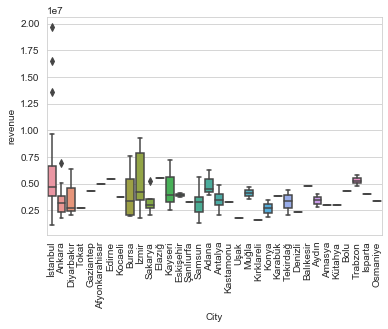

In [89]:
sns.boxplot(df['City'], df['revenue'])
plt.xticks(rotation=90)

Text(0, 0.5, 'Revenue')

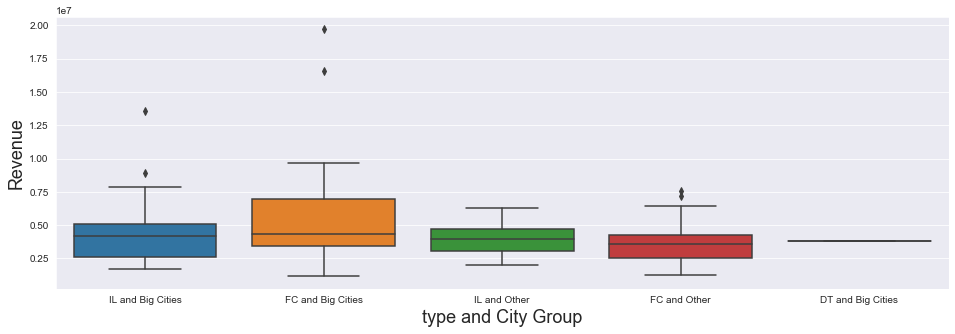

In [7]:
# checking if type and city have distinct ranges

df['type and City Group'] = df['Type'] + ' ' + 'and' + ' ' +  df['City Group']

plt.figure(figsize=(16, 5))
sns.set_style('darkgrid')
sns.boxplot(df['type and City Group'], df['revenue'])
plt.xlabel('type and City Group', fontsize=18)
plt.ylabel('Revenue', fontsize=18)

In [8]:
# checking the level of distinvtion in revenue ranges per year

df['year'] = df['Open Date'].dt.year
def yearly_boxplot(year):
    per_year =  df[df['year'] == year]
    def plot_box_inside(feature):
        sns.boxplot(per_year[feature], per_year['revenue'])
        plt.title('year {}'.format(str(year)), fontsize=18)
    features = ['type and City Group', 'City Group', 'Type']
    interact(plot_box_inside, feature = features)

In [9]:
for year in sorted(list(df['year'].unique())):
    display(year)
    yearly_boxplot(year)

1996

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

1997

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

1998

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

1999

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2000

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2002

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2004

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2005

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2006

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2007

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2008

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2009

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2010

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2011

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2012

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2013

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

2014

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type'), v…

##### From the above widgets plot, it can be seen that the city_groups and types have distinct ranges when grouped by year. In other words, they have yearly distinct ranges. 
##### This implies that the year column will make a good feature for the model

In [119]:
# df['months'] = df['Open Date'].dt.month
# def monthofyear_boxplot(year, month):
#     per_year =  df[(df['year'] == year) & (df['months'] == month[0])]
#     def plot_box_inside(feature):
#         sns.boxplot(per_year[feature], per_year['revenue'])
#         plt.title('{} {}'.format(month[1], str(year)), fontsize=18)
#     features = ['type and City Group', 'City Group', 'Type']
#     interact(plot_box_inside, feature = features)

In [10]:
# check the correlation values of selected columns with the revenue column

# from scipy.stats import pointbiserialr, kruskal

# df_copy = df.copy()

# df_copy['City Group Binary'] = df_copy['City Group'].map({'Big Cities':1, 'Other':0})
# df_copy['Type_encode'] = df_copy['Type'].map({'IL':0, 'FC':1, 'DT': 2})

# print(pointbiserialr(df_copy['City Group Binary'], df_copy['revenue']))
# print(kruskal(df_copy['City Group Binary'], df_copy['revenue']))
# print(kruskal(df_copy['Type_encode'], df_copy['revenue']))

2.793478695162504


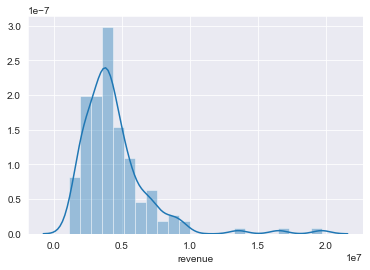

In [12]:
# check skew of revenue columns
print(df['revenue'].skew())
sns.distplot(df['revenue'])

In [13]:
def plot_hist(feature):
    sns.distplot(df[feature])
    plt.show()
    
features = ['P' + str(i) for i in range(1, 38)]

interact(plot_hist, feature = features)

interactive(children=(Dropdown(description='feature', options=('P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',…

<function __main__.plot_hist(feature)>

In [14]:
def yearly_scatterplot(year):
    per_year =  df[df['year'] == year].reset_index()
    def plot_scatter_inside(feature):
        sns.scatterplot(per_year.index, per_year['revenue'], hue=per_year[feature])
        plt.title('year {}'.format(str(year)), fontsize=18)
        
    features = ['type and City Group', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
                'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
                'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
                'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
                'P36', 'P37']
#     features = ['type and City Group', 'City Group', 'Type']
    interact(plot_scatter_inside, feature = features)

In [15]:
yearly_scatterplot(2008)

interactive(children=(Dropdown(description='feature', options=('type and City Group', 'City Group', 'Type', 'P…

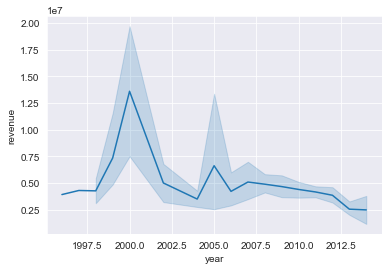

In [16]:
# TREND PER YEAR
df['month']= df['Open Date'].dt.month
df['year']= df['Open Date'].dt.year
sns.lineplot(df['year'], df['revenue'])

####  From the above plot it,  looks like there is an anomaly in revenue value at year 2000 and 2005

In [17]:


summary = df.groupby('year')['revenue'].agg({'median': lambda x: x.median(), 
                                        'std': lambda x: x.std(), 
                                        'mean': lambda x: x.mean(), 
                                        '1st Qunatile': lambda x: x.quantile(0.15),
                                        'max': max, 
                                        'max-index': lambda x: x.idxmax(),
                                        'Count': lambda x: x.count()})


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  import sys


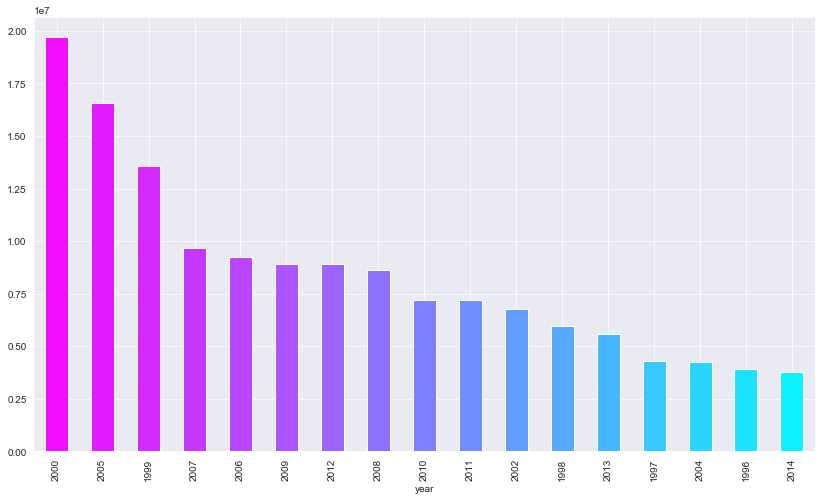

In [18]:
summary['max'].sort_values(ascending=False).plot(kind='bar', color = sns.color_palette('cool_r', 17), figsize=(14, 8))

##### Year 2000, 2005 and 1999 have max values that are significantly higher than the other years. Let's peruse through the data more to validate our claim.

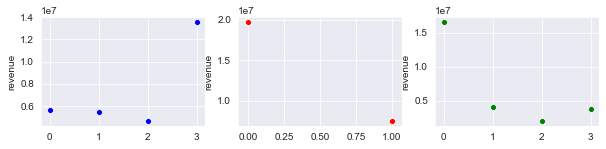

In [19]:

plt.figure(figsize=(10, 2))
color = ['blue', 'red', 'green']
anomaly_index = [99, 16, 75]
anomaly_months = []
replace_values =[]
for i, year in  enumerate([1999, 2000, 2005]):
    ax=plt.subplot(130 + i +1)
    data = df[df['year'] == year]
    anomaly_months.append(data['month'][anomaly_index[i]])
    clean_data = data.drop(index=anomaly_index[i])
    replace_values.append(clean_data['revenue'].mean())
    data = data.reset_index(drop = True)
    
    sns.scatterplot(x=data.index, y=data.revenue, ax=ax, color=color[i])
    

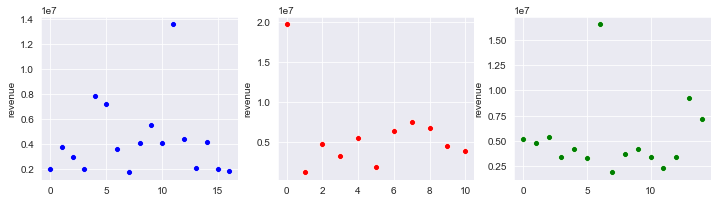

In [20]:
plt.figure(figsize=(12, 3))
replace_values = []
for i, month in enumerate(anomaly_months):
    ax=plt.subplot(130 + i +1)
    data = df[df['month']== month]
    replace_values.append(data.drop(index=anomaly_index[i])['revenue'].max())
    data = data.reset_index(drop=True)
    sns.scatterplot(x=data.index, y=data.revenue, ax=ax, color=color[i])

##### The data points appear to be anomalies when plotted alongside data points of the same month and year. This validates our assumptions

In [316]:
# df.groupby('months')['revenue'].agg({'lists': lambda x: list(x)}).reset_index()['lists'][9]

In [21]:
# dropping anomaly datapoint
new_df=df.drop(index=anomaly_index)

0.8952934755058413


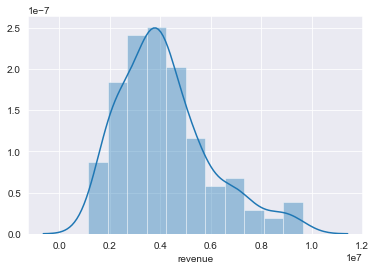

In [22]:
# checking new skew

print(new_df['revenue'].skew())
sns.distplot(new_df['revenue'])

##### Skew significantly reduced after removing anomaly or outlier

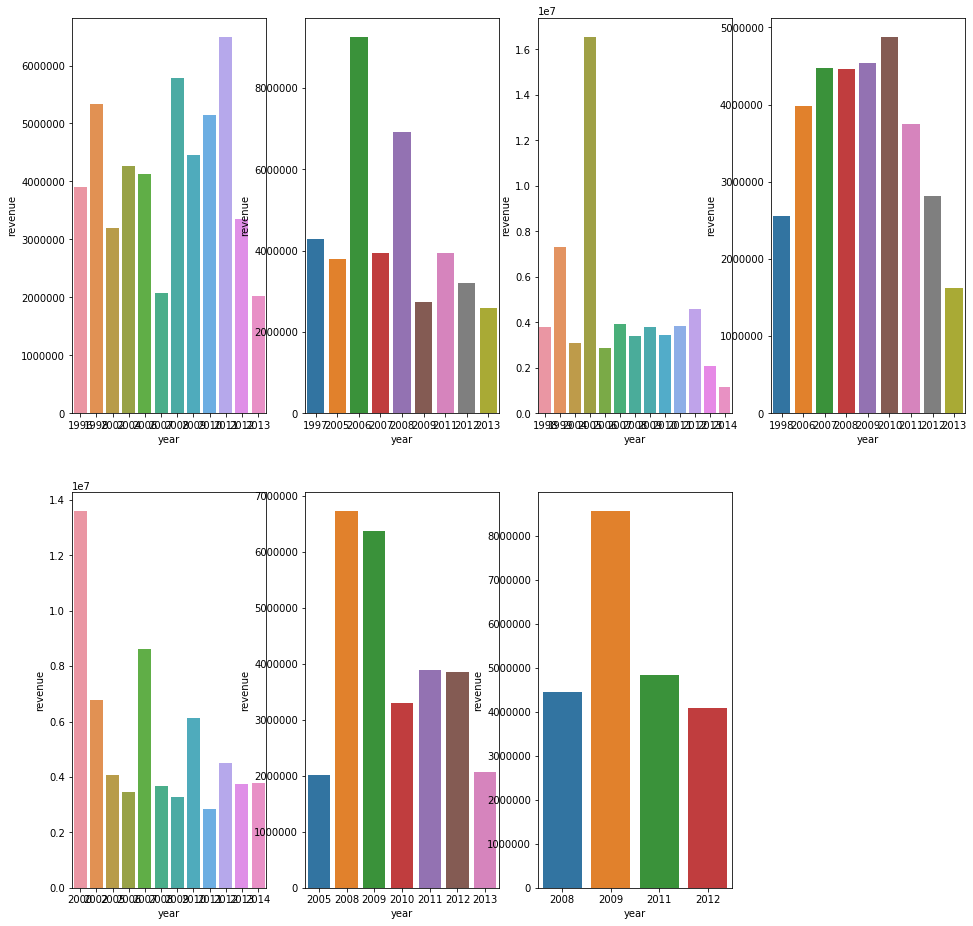

In [63]:
# def plot_barplot(day, ax):
#     df_year = df_time[df_time['dayofweek'] == day]
#     dayofweek = df_year.groupby('year')['revenue'].mean().reset_index()
#     sns.barplot(x='year', y='revenue', data=dayofweek, ax=ax)
    
# features = list(df_time['dayofweek'].unique())
# features.append('')
# fig, axs = plt.subplots(2, 4, figsize=(16, 16))

# for day, ax, i in zip(features, axs.flatten(), list(range(8))):
#     if i == 7:
#         ax.set_visible(False)
#     else:
#         plot_barplot(day, ax)

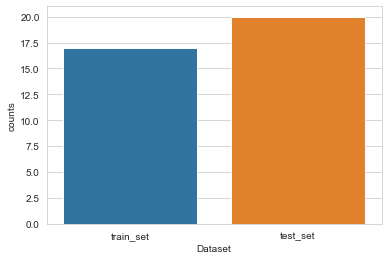

In [23]:
test_df['year'] = test_df['Open Date'].dt.year
unique_years = pd.DataFrame()
unique_years['counts'] = [df['year'].nunique(), test_df['year'].nunique()]
unique_years['Dataset'] = ['train_set', 'test_set']

sns.set_style('whitegrid')
sns.barplot(x='Dataset', y='counts', data=unique_years)

##### From the above, the test set has more unique years, the train and test sets will need some form of regularisation for the year column

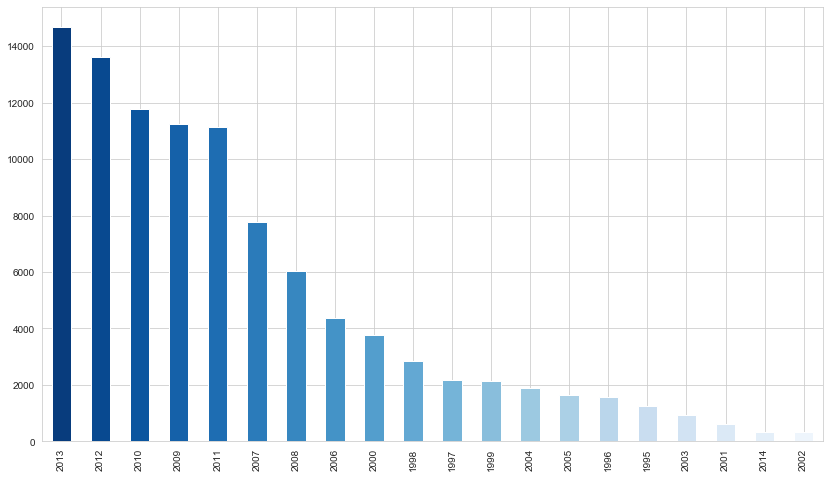

In [24]:
union_df['Open Date'].dt.year.value_counts().plot(kind='bar', color = sns.color_palette('Blues_r', 20), figsize=(14, 8))

##### Apparently, a lot of resturants opened in the year 2013. about 14%  of the restaurants in turkey opened at that year

## Preprocessing/Modelling

In [25]:
union_df['year'] = union_df['Open Date'].dt.year

In [26]:
City_year = union_df.groupby(['year', 'City']).size().reset_index()
City_yr_list = City_year.values.tolist()

In [27]:
union_df
def insert_counts(col):
    year = col[0]
    City = col[1]
    for yr, ct, num in City_yr_list:
        if (year == yr) and (City == ct):
            return num
            break
union_df['yearly_restaurant_number'] = union_df[['year', 'City']].apply(insert_counts, axis = 1)

In [28]:
union_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,year,yearly_restaurant_number
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,1999,624
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2008,578
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2013,108
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2012,1
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,2009,200


In [29]:
union_df = union_df.reset_index(drop=True)
union_df['cumulative_restaurants'] = 0
for city in union_df['City'].unique():
    first = union_df[union_df['City'] == city][['City', 'year', 'yearly_restaurant_number']].sort_values('year')
    index = list(first.index)
    second = first.drop_duplicates('year')
    second['cumulative']= second['yearly_restaurant_number'].cumsum()

    merge = first.merge(second, on='year', how='left')
    union_df.iloc[index, [-1]] = list(merge['cumulative'])
  

union_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,year,yearly_restaurant_number,cumulative_restaurants
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,1999,624,3766
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2008,578,3393
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2013,108,956
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2012,1,1
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,2009,200,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,99995,2000-01-05,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2000,184,674
100133,99996,2011-07-18,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0,2011,33,239
100134,99997,2012-12-29,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2,2012,4673,29546
100135,99998,2013-10-12,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0,2013,4514,34060


In [30]:
## regularising the unique years

def group_year(year):
    if year == 1995 or year == 1996:
        return 'year 1'
    elif year == 1997 or year == 1998:
        return 'year 2'
    elif year == 1999 or year == 2000:
        return 'year 3'
    elif year == 2001 or year == 2002:
        return 'year 4'
    elif year == 2003 or year == 2004:
        return 'year 5'
    elif year == 2005 or year == 2006:
        return 'year 6'
    elif year == 2007 or year == 2008:
        return 'year 7'
    elif year == 2009 or year == 2010:
        return 'year 8'
    elif year == 2011 or year == 2012:
        return 'year 9'
    elif year == 2013 or year == 2014:
        return 'year 10'
    
union_df['cat_year'] = union_df['year'].apply(group_year)

In [31]:
union_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,year,yearly_restaurant_number,cumulative_restaurants,cat_year
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,1999,624,3766,year 3
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2008,578,3393,year 7
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2013,108,956,year 10
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2012,1,1,year 9
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,2009,200,768,year 8


In [33]:
print(union_df[:137]['cat_year'].nunique())
print(union_df[137:]['cat_year'].nunique())

10
10


In [34]:
union_df['Type_mod'] = union_df['Type'].apply(lambda x: 'DT' if x == 'MB' else x)

data = pd.read_html('https://www.citypopulation.de/en/turkey/cities/')

In [35]:
cities_data = pd.read_csv('Turkey cities.csv')

In [36]:
full_city_list = cities_data['Name'].unique()

In [52]:
search_list = list((set(union_df['City'].unique())) - set(full_city_list))

In [53]:
search_list.sort()

In [54]:
search_list

['Afyonkarahisar', 'Elazığ', 'Mersin', 'Tanımsız']

In [40]:
len(full_city_list)

82

In [39]:
def calc_growth_rate(col):
    year_2011 = col[0]
    year_1990 = col[1]
    GR = ((year_2011 - year_1990)/(21 * year_1990)) * 100
    return GR
    
cities_data['Growth_rate']= cities_data[['PopulationCensus (C)2011-11-02', 
                                         'PopulationCensus (C)1990-10-21']].apply(calc_growth_rate, axis = 1)

In [41]:
cities_data.head()

,Unnamed: 0,Name,Abbr.,Status,Capital,AreaA-L (km²),PopulationCensus (C)1990-10-21,PopulationCensus (C)2000-10-22,PopulationCensus (C)2011-11-02,PopulationEstimate (E)2019-12-31,Unnamed: 10,Unnamed: 11,Growth_rate
0,NaN,Adana,ADA,MProv,Adana,13915,1549233,1849478,2102375,2237940,1391500.0,→,1.700202
1,NaN,Adıyaman,ADI,Prov,Adıyaman,7033,510827,623811,594163,626465,703300.0,→,0.776854
2,NaN,Afyonkarahisar (Afyon),AFY,Prov,Afyonkarahisar,14314,738979,812416,701461,729483,1431400.0,→,-0.241762
3,NaN,Ağrı,AGR,Prov,Ağrı,11470,437093,528744,553241,536199,1147000.0,→,1.265373
4,NaN,Aksaray,AKS,Prov,Aksaray,7570,330569,396084,379163,416367,757000.0,→,0.700005


In [42]:
#population.to_csv('Turkeycities2.csv', index=False)
population = pd.read_csv('Turkeycities2.csv')

In [20]:
#population['Name'] = population['Name'].replace('Elâzığ', search_list[2])

In [43]:
City_pop = cities_data[['Name', 'PopulationCensus (C)2011-11-02', 'Growth_rate']]

In [44]:
pop = population[['Name', 'PopulationEstimate (E)2011-12-31', 'PopulationCensus (Cf)1990-10-21']]
extra_pop = pd.DataFrame()
for city in search_list:
    extra_pop = pd.concat([extra_pop, pop[pop['Name'].str.contains(city)]], axis = 0)
extra_pop

,Name,PopulationEstimate (E)2011-12-31,PopulationCensus (Cf)1990-10-21
4,Afyonkarahisar (Afyon),189006,95643
225,Mersin (İçel),859680,422357
108,Elazığ,341220,204603


In [48]:
extra_pop['PopulationCensus (Cf)1990-10-21'] = extra_pop['PopulationCensus (Cf)1990-10-21'].astype(float)
extra_pop['PopulationEstimate (E)2011-12-31'] = extra_pop['PopulationEstimate (E)2011-12-31'].astype(float)

In [55]:
extra_pop['Growth_rate'] = extra_pop[['PopulationEstimate (E)2011-12-31', 
                                    'PopulationCensus (Cf)1990-10-21']].apply(calc_growth_rate, axis = 1)

In [57]:
extra_pop['Name'] = extra_pop['Name'].replace({'Mersin (İçel)': search_list[2], 
                                               'Afyonkarahisar (Afyon)': search_list[0]})

In [58]:
extra_pop = extra_pop.drop(columns = 'PopulationCensus (Cf)1990-10-21')

In [59]:
extra_pop.columns = ['Name', 'PopulationCensus (C)2011-11-02', 'Growth_rate']
population_df = pd.concat([City_pop, extra_pop], axis=0)
population_df

,Name,PopulationCensus (C)2011-11-02,Growth_rate
0,Adana,2102375.0,1.700202
1,Adıyaman,594163.0,0.776854
2,Afyonkarahisar (Afyon),701461.0,-0.241762
3,Ağrı,553241.0,1.265373
4,Aksaray,379163.0,0.700005
...,...,...,...
80,Zonguldak,614775.0,-0.283818
81,Turkey,74525696.0,1.522232
4,Afyonkarahisar,189006.0,4.648387
225,Mersin,859680.0,4.930640


In [60]:
population_df = population_df.reset_index(drop = True)

In [61]:
union=union_df.copy()
union_df = union_df.merge(population_df[['Name', 'Growth_rate', 'PopulationCensus (C)2011-11-02']], left_on ='City', right_on='Name', how='left')

In [62]:
union_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,year,yearly_restaurant_number,cumulative_restaurants,cat_year,Type_mod,Name,Growth_rate,PopulationCensus (C)2011-11-02
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,1999,624,3766,year 3,IL,İstanbul,4.215454,13565798.0
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2008,578,3393,year 7,FC,Ankara,2.401332,4868418.0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2013,108,956,year 10,IL,Diyarbakır,2.018046,1561110.0
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2012,1,1,year 9,IL,Tokat,-0.836499,592481.0
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,2009,200,768,year 8,IL,Gaziantep,3.436526,1739569.0


In [63]:
pd.options.display.max_rows = 70
union_df.groupby('City')['PopulationCensus (C)2011-11-02'].mean().reset_index().sort_values('PopulationCensus (C)2011-11-02', ascending=False)

,City,PopulationCensus (C)2011-11-02
60,İstanbul,13565798.0
4,Ankara,4868418.0
61,İzmir,3952036.0
12,Bursa,2640128.0
0,Adana,2102375.0
5,Antalya,2035563.0
31,Konya,2033227.0
21,Gaziantep,1739569.0
62,Şanlıurfa,1701127.0
30,Kocaeli,1595643.0


In [65]:
## Istanbul is far larger than any cities, it wont be fair to group it with big cities. 
#morever, it forms 34 percent of the data

def group_cities(population):
    if population < 2000000:
        return 'small cities'
    elif population >= 2000000 and population < 5000000:
        return 'medium cities'
    elif population >=5000000:
        return 'large cities'
union_df['City_cat'] = union_df['PopulationCensus (C)2011-11-02'].apply(group_cities)

In [66]:
union_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,year,yearly_restaurant_number,cumulative_restaurants,cat_year,Type_mod,Name,Growth_rate,PopulationCensus (C)2011-11-02,City_cat
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,...,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,1999,624,3766,year 3,IL,İstanbul,4.215454,13565798.0,large cities
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,...,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2008,578,3393,year 7,FC,Ankara,2.401332,4868418.0,medium cities
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,...,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2013,108,956,year 10,IL,Diyarbakır,2.018046,1561110.0,small cities
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,...,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2012,1,1,year 9,IL,Tokat,-0.836499,592481.0,small cities
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,...,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,2009,200,768,year 8,IL,Gaziantep,3.436526,1739569.0,small cities


In [726]:

#union_df[['PopulationCensus (C)2011-11-02']] = scaler_pop.fit_transform(union_df[['PopulationCensus (C)2011-11-02']])

In [1003]:
#union_df[['Name_x']] = scaler_pop.inverse_transform(union_df[['PopulationCensus (C)2011-11-02']])

In [67]:
def get_population_per_year(col):
    GR = col[0]
    year = col[1]
    pop = col[2]
    if year < 2011:
        n_years= year - 1990
        denominator =((GR/100 * n_years) + 1)
        population = pop/denominator
        return population
    elif year == 2011:
        return pop
    elif year > 2011:
        n_years= year - 2011
        return (GR/100 * pop * n_years) + pop

union_df['yearly_population'] = union_df[['Growth_rate', 'year', 'PopulationCensus (C)2011-11-02']].apply(get_population_per_year, axis = 1)

In [68]:
union_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,...,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,year,yearly_restaurant_number,cumulative_restaurants,cat_year,Type_mod,Name,Growth_rate,PopulationCensus (C)2011-11-02,City_cat,yearly_population
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,...,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,1999,624,3766,year 3,IL,İstanbul,4.215454,13565798.0,large cities,9.834629e+06
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,...,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,2008,578,3393,year 7,FC,Ankara,2.401332,4868418.0,medium cities,3.399164e+06
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,...,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2013,108,956,year 10,IL,Diyarbakır,2.018046,1561110.0,small cities,1.624118e+06
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,...,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2012,1,1,year 9,IL,Tokat,-0.836499,592481.0,small cities,5.875249e+05
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,...,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,2009,200,768,year 8,IL,Gaziantep,3.436526,1739569.0,small cities,1.052409e+06


In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
scaling_columns = ['yearly_restaurant_number',
                   'PopulationCensus (C)2011-11-02',
                   'yearly_population', 'year', 'cumulative_restaurants']
Obsfucated_columns = ['P{}'.format(i) for i in range(1, 38)]
MMS = MinMaxScaler()
MMS2 = MinMaxScaler()
union_df[scaling_columns] = MMS.fit_transform(union_df[scaling_columns])
union_df[Obsfucated_columns] = MMS2.fit_transform(union_df[Obsfucated_columns])

In [71]:

union_df['days_till_present'] = (union_df['Open Date'] - datetime.now()).dt.days

In [72]:
union_df[['days_till_present']] = MinMaxScaler().fit_transform(union_df[['days_till_present']])

In [73]:
union_df['days'] = union_df['Open Date'].dt.day
union_df['dayofyear'] = union_df['Open Date'].dt.dayofyear

In [74]:
train = union_df[:137]
test= union_df[137:]
train['revenue'] = df['revenue']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
test = test.reset_index(drop=True)

In [76]:
train_clean= train.drop(columns = ['Id', 'City', 'Type', 'Open Date', 'Name'])
test_clean = test.drop(columns = ['Id', 'City', 'Type', 'Open Date', 'Name'])
cat_col = [col for col in train_clean.columns if train_clean[col].dtype == 'object']
cat_col

['City Group', 'cat_year', 'Type_mod', 'City_cat']

In [77]:
test_clean['City_cat'].unique()

array(['small cities', 'medium cities', 'large cities', None],
      dtype=object)

In [78]:
test_clean['City_cat'] = test_clean['City_cat'].fillna('small cities')

In [79]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
for col in cat_col:

    encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
    a = encoder.fit_transform(np.array(train_clean[col]).reshape(-1, 1))
    b = encoder.transform(np.array(test_clean[col]).reshape(-1, 1))
    
    train_clean = train_clean.join(pd.DataFrame(a, columns =list(encoder.get_feature_names([col]))))
    test_clean = test_clean.join(pd.DataFrame(b, columns =list(encoder.get_feature_names([col]))))

In [80]:
test_clean = test_clean.drop(columns = cat_col)
train_clean = train_clean.drop(columns = cat_col)

In [81]:
test_clean['PopulationCensus (C)2011-11-02'] = test_clean['PopulationCensus (C)2011-11-02'].fillna(test_clean['PopulationCensus (C)2011-11-02'].min())
test_clean['yearly_population'] = test_clean['yearly_population'].fillna(test_clean['yearly_population'].min())
test_clean['Growth_rate'] =test_clean['Growth_rate'].fillna(test_clean['Growth_rate'].min())

In [83]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, LeaveOneOut, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LassoCV, HuberRegressor, RidgeCV, ElasticNet
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import RobustScaler
import warnings
import numpy as np

warnings.filterwarnings('ignore')





C:\ProgramData\Anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10065] A socket operation was attempted to an unreachable host
  RuntimeWarning,


In [82]:
anomaly_index = [99, 16, 75]
train_clean2 = train_clean.drop(index=anomaly_index)

In [145]:
X = train_clean2.drop(columns = 'revenue')
y = train_clean2['revenue']#[train_clean['City_cat'] == 0]


- {'max_features': 'log2', 'max_leaf_nodes': 9, 'n_estimators': 140}
- {'max_features': 'log2', 'max_leaf_nodes': 12, 'n_estimators': 100}
- {'max_features': 'log2', 'max_leaf_nodes': 6, 'n_estimators': 120}
- {'max_features': 'log2', 'max_leaf_nodes': 7, 'n_estimators': 100, 'random_state': 400}
 
 ### Best parameter so far.......
 - {'max_features': 'log2', 'max_leaf_nodes': 8, 'n_estimators': 100, 'random_state': 200}

### Best Model so far.....
- RandomForestRegressor(max_depth=5, max_features='log2', max_leaf_nodes=7,
                      n_estimators=70, random_state=200)

In [306]:

model2 = RandomForestRegressor(n_estimators=70, max_leaf_nodes= 7, max_features='log2', random_state=200, max_depth = 5)
model2.fit(X,y)

RandomForestRegressor(max_depth=5, max_features='log2', max_leaf_nodes=7,
                      n_estimators=70, random_state=200)

In [307]:
pred2 = pd.Series(model2.predict(test_clean))

In [308]:
pred2

0        3.993494e+06
1        3.741004e+06
2        3.661298e+06
3        3.385294e+06
4        4.012961e+06
             ...     
99995    4.484402e+06
99996    3.309518e+06
99997    4.040085e+06
99998    3.648729e+06
99999    4.783070e+06
Length: 100000, dtype: float64

In [309]:
submission = pd.DataFrame()
submission['Id']= test_df['Id']
submission['Prediction'] =pred2

In [310]:
submission.to_csv('31th.csv', index=False)